# 랜덤 포레스트, XGBoost, 인공신경망

- 의사결정 트리에서 파생된 모델로 앙상블 학습기법을 적용한 모델이다.
- 앙상블 학습기법이란 새로운 데이터에 대해서 여러 개의 트리로 학습을 수행한 후 학습 결과들을 종합해서 예측하는 모델이다.
- 기존의 의사결정 트리 방식에 비해서 많은 데이터를 이용하여 학습을 수행하기 때문에 비교적 예측력이 뛰어나고, 과적합 문제를 해결할 수 있다. 
- 과적합 문제? 학습 데이터 셋에서는 높은 정확도가 나타나지만 새로운 데이터에서는 정확도가 떨어지는 현상을 의미한다. 
- 랜덤 포레스트 모델은 기본적으로 raw data를 대상으로 복원추출 방식으로 데이터의 양을 증가시킨 후 모델을 생성하기 때문에 데이터의 양이 부족해서 발생하는 과적합 문제를 해결할 수 있다. 
- 구성된 학습데이터를 이용하여 학습한 결과를 종합하여 예측 모델을 생성한다. 즉, 각각의 분류모델에서 예측된 결과를 토대로 투표방식으로 최적의 예측치를 선택하게 된다.

---

- 랜덤 포레스트 학습데이터 구성방법
  - 표본에서 일부분만 복원추출 방법으로 랜덤하게 샘플링하는 방식인 부트스트랩 표본 방식으로 학습데이터를 추출하여 트리를 생성한다. 
  - 입력 변수 중에서 일부 변수만 적용하여 트리의 자식 노드를 분류한다.

In [1]:
install.packages('randomForest')
library(randomForest)
data(iris)

model = randomForest(Species~. , data = iris)
model

Warning message:
"package 'randomForest' is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages"
randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.




Call:
 randomForest(formula = Species ~ ., data = iris) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 2

        OOB estimate of  error rate: 4.67%
Confusion matrix:
           setosa versicolor virginica class.error
setosa         50          0         0        0.00
versicolor      0         46         4        0.08
virginica       0          3        47        0.06

- Number of trees: 500 $\to$  학습데이터로 500개의 포레스트가 복원 추출방식으로 생성되었다는 의미.
- No. of variables tried at each split: 2 $\to$ 두 개의 변수를 이용하여 트리의 자식 노드가 분류되었다는 의미이다. 

In [4]:
model2 = randomForest(Species~., data= iris, ntree = 300, mtry = 4, na.action = na.omit)
model2


Call:
 randomForest(formula = Species ~ ., data = iris, ntree = 300,      mtry = 4, na.action = na.omit) 
               Type of random forest: classification
                     Number of trees: 300
No. of variables tried at each split: 4

        OOB estimate of  error rate: 4.67%
Confusion matrix:
           setosa versicolor virginica class.error
setosa         50          0         0        0.00
versicolor      0         47         3        0.06
virginica       0          4        46        0.08

- 랜덤 포레스트의 수를 300개, 자식 노드를 분류하는 변수를 4개로 지정하여 모델을 생성.
- na.action 속성은 결측치가 있는 경우 처리할 방법을 지정하는 속성이다. 여기서는 na.omit() 생략 함수를 이용하여 결측치를 제거한다.

In [8]:
# 중요 변수를 생성하여 랜덤포레스트 모델 생성
model3 = randomForest(Species~., data = iris, importance = T, na.action = na.omit)

# 중요 변수 보기
importance(model3)

,setosa,versicolor,virginica,MeanDecreaseAccuracy,MeanDecreaseGini
Sepal.Length,6.752026,8.355323,8.285698,11.169422,10.524725
Sepal.Width,4.743311,1.838934,5.823679,6.199311,2.333197
Petal.Length,24.292547,35.441244,27.683566,35.102816,44.848427
Petal.Width,20.224071,31.827480,27.702492,30.544380,41.554505


- importance 속성은 분류모델을 생성하는 과정에서 입력 변수 중 가장 중요한 변수가 어떤 변수인지를 알려주는 역할을 한다. 
- MeanDeceaseAccuracy는 분류정확도를 개선하는 데 기여한 변수를 수치로 제공
- MeanDecreaseGini는 노드 불순도(불확실성)를 개선하는 데 기여한 변수를 수치로 제공
- 따라서 iris의 꽃의 종류를 분류하는 데 있어 4개의 x 변수 중에서 가장 크게 기여하는 변수(즉, 중요변수)는 Petal.Length로 나타난다. 

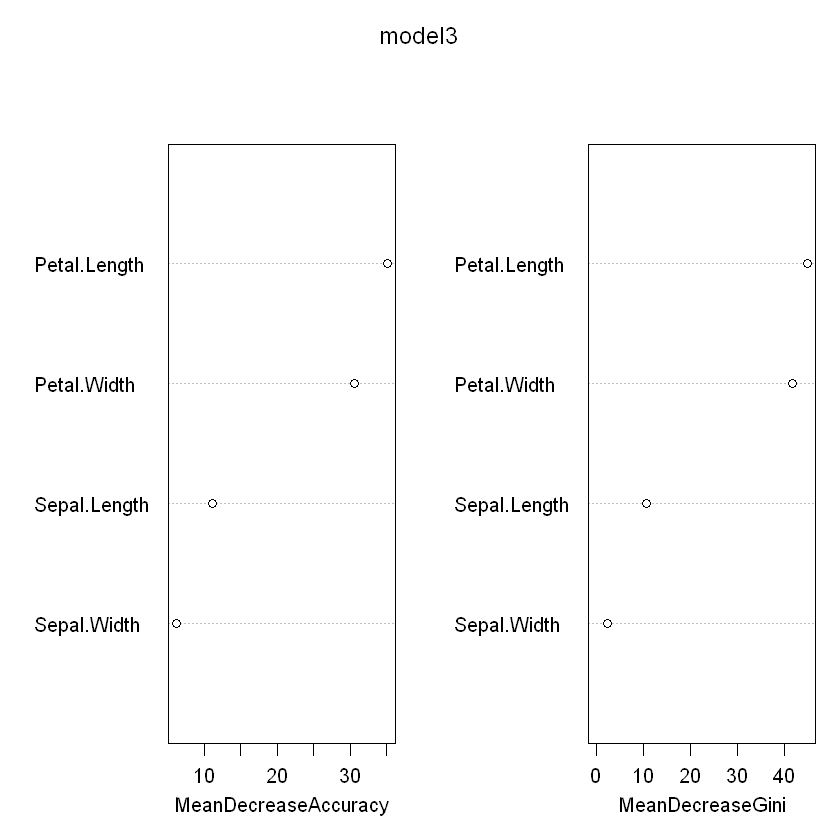

In [10]:
# 중요 변수 시각화
varImpPlot(model3)

- 참고) 
  - 엔트로피 = 불확실성 척도
    - 엔트로피가 작으면 불확실성이 낮아진다. 즉, 불확실성이 낮아지면 그만큼 분류정확도가 향상된다고 볼 수 있다. 
    - 예를 들어, 앞면과 뒷면이 나올 확률이 동일한 경우 엔트로피 결과는 1이라면, 앞면이 나올 확률이 더 높은 경우엔 엔트로피는 0.88로 낮아진다. 이유는 앞면이 나올 확률이 높아졌기 때문에 그만큼 불확실성이 낮아진 것이다. 

- 최적의 파라미터(ntree, mtry) 찾기

In [11]:
# 속성값 생성
ntree = c(400, 500, 600) # 랜덤 포레스트 수
mtry = c(2:4) # 자식 노드를 분류하는 변수의 수
param = data.frame(n = ntree, m = mtry)
param

n,m
<dbl>,<int>
400,2
500,3
600,4


In [12]:
# 이중 for() 함수를 이용하여 모델 생성
for(i in param$n){
    cat('ntree=', i, '\n')
    for(j in param$m){
        cat('mtry=',j,'\n')
        model_iris = randomForest(Species~., data = iris, ntree = i, mtry = j, na.action = na.omit)
        print(model_iris)}}

ntree= 400 
mtry= 2 

Call:
 randomForest(formula = Species ~ ., data = iris, ntree = i, mtry = j,      na.action = na.omit) 
               Type of random forest: classification
                     Number of trees: 400
No. of variables tried at each split: 2

        OOB estimate of  error rate: 4.67%
Confusion matrix:
           setosa versicolor virginica class.error
setosa         50          0         0        0.00
versicolor      0         47         3        0.06
virginica       0          4        46        0.08
mtry= 3 

Call:
 randomForest(formula = Species ~ ., data = iris, ntree = i, mtry = j,      na.action = na.omit) 
               Type of random forest: classification
                     Number of trees: 400
No. of variables tried at each split: 3

        OOB estimate of  error rate: 4.67%
Confusion matrix:
           setosa versicolor virginica class.error
setosa         50          0         0        0.00
versicolor      0         47         3        0.06
virginica

- 이중 for() 함수는 트리 3개와 변수 3이 곱해져서 전체 9회를 반복.
- 9개의 모델이 생성된 결과에서 오차 비율(OOB)을 비교하여 최적의 트리와 변수를 결정한다. 

---

- xgboost
  - 랜덤 포레스트와 같은 앙상블 학습 기법으로 모델을 생성하는 분류모델이다. 
  - 부스팅 방식으로 기반으로 만들어진 모델이기 때문에 분류하기 어려운 특정 영역에 초점을 두고 정확도를 높이는 알고리즘으로 구현되었다.
  - 따라서 높은 정확도가 가장 큰 강점이다. 
  - 배깅 방식과 동일하게 복원 추출방식으로 첫 번째 학습 데이터 셋을 생성하는 방법은 동일하지만, 두 번째부터는 학습된 트리 모델의 결과를 바탕으로 정확도가 낮은 영역에 높은 가중치를 적용하여 해당 영역을 학습 데이터 셋으로 구성되게 한다. 
    - 결론적으로 기계학습이 안 되는 데이터 셋을 집중적으로 학습하여 트리 모델의 정확도를 높이는 방식이다. 
    - 이상치에 취약할 수 있다. 

In [13]:
install.packages('xgboost')
library(xgboost)

# ifelse함수를 이용하여 y변수를 재정의하기
iris_label = ifelse(iris$Species == 'setosa', 0 , ifelse(iris$Species == 'versicolor',1,2))
table(iris_label)

package 'xgboost' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\ehfus\AppData\Local\Temp\RtmpELAtJz\downloaded_packages


iris_label
 0  1  2 
50 50 50 

In [16]:
head(iris,3) # 칼럼추가 전

# 칼럼 추가 후
iris$label = iris_label
head(iris,3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,label
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
1,5.1,3.5,1.4,0.2,setosa,0
2,4.9,3.0,1.4,0.2,setosa,0
3,4.7,3.2,1.3,0.2,setosa,0


In [24]:
# data set 생성
idx = sample(nrow(iris),  0.7*nrow(iris))
train = iris[idx,]
test = iris[-idx,]

# matrix 객체 변환
train_mat = as.matrix(train[-c(5:6)]) # 다섯번째와 여섯번째는 정답레이블이기 때문에 제외
# 정답 레이블 따로 추출
train_lab = train$label

In [25]:
# xgb.DMatrix로 객체 변환
dtrain = xgb.DMatrix(data = train_mat, label = train_lab)
dtrain

# model 생성 - xgboost matrix 객체를 이용
xgb_model = xgboost(data = dtrain, max_depth = 2, eta = 1, nthread = 2,nrounds = 2,
                   objective = 'multi:softmax',
                   num_class = 3,
                   verbose = 0)
xgb_model

xgb.DMatrix  dim: 105 x 4  info: label  colnames: yes

[14:11:36] WARNING: amalgamation/../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


##### xgb.Booster
raw: 6.3 Kb 
call:
  xgb.train(params = params, data = dtrain, nrounds = nrounds, 
    watchlist = watchlist, verbose = verbose, print_every_n = print_every_n, 
    early_stopping_rounds = early_stopping_rounds, maximize = maximize, 
    save_period = save_period, save_name = save_name, xgb_model = xgb_model, 
    callbacks = callbacks, max_depth = 2, eta = 1, nthread = 2, 
    objective = "multi:softmax", num_class = 3)
params (as set within xgb.train):
  max_depth = "2", eta = "1", nthread = "2", objective = "multi:softmax", num_class = "3", validate_parameters = "TRUE"
xgb.attributes:
  niter
callbacks:
  cb.evaluation.log()
# of features: 4 
niter: 2
nfeatures : 4 
evaluation_log:
 iter train_mlogloss
    1       0.285526
    2       0.138916

- xgboost 전용 xg.DMatrix() 함수를 이용하여 학습 데이터 셋을 생성한다.

In [26]:
# testset 생성
test_mat = as.matrix(test[-c(5:6)])
test_lab = test$label

# model prediction
pred_iris = predict(xgb_model, test_mat)
pred_iris

[1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 1 2 2 2 2
[39] 2 1 2 2 2 2 2

- 트리 모델을 평가하기 위해서 검정 데이터 셋을 생성하고 predict() 함수를 이용하여 트리 모델에 검정 데이터 셋을 적용하여 예측치를 생성한다.

In [27]:
# confusion matrix 혼돈 매트릭스
table(pred_iris, test_lab)

         test_lab
pred_iris  0  1  2
        0 18  0  0
        1  0 11  2
        2  0  0 14

In [28]:
# 모델 성능평가
(18 + 11 + 14)/length(test_lab)

[1] 0.9555556

- 다른 모델에 비해서 분류정확도가 매우 높게 나타난 것을 확인할 수 있다.

Feature,Gain,Cover,Frequency
<chr>,<dbl>,<dbl>,<dbl>
Petal.Length,0.540131985,0.67957146,0.63636364
Petal.Width,0.458853590,0.28951761,0.27272727
Sepal.Length,0.001014426,0.03091093,0.09090909


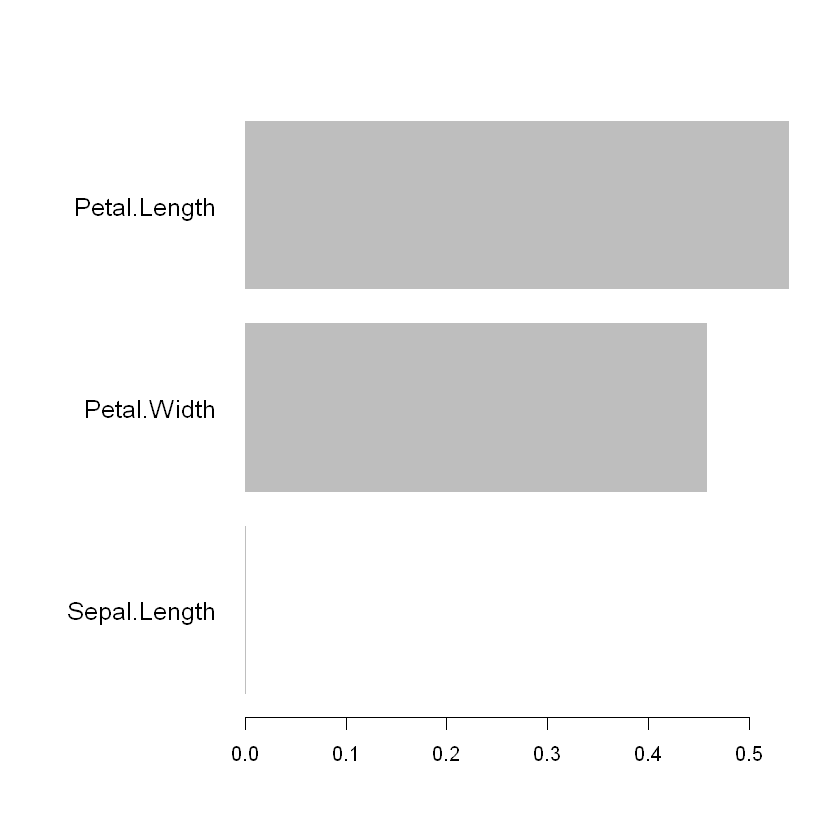

In [29]:
# model의 중요 변수와 영향력 보기
importance_matrix = xgb.importance(colnames(train_mat), model = xgb_model)
importance_matrix

# 중요변수 시각화
xgb.plot.importance(importance_matrix)

- Petal.Length와 Petal.Width 변수가 가장 중요한 변수로 나타남을 알 수 있다.

---

- 인공신경망
  - 인간의 두뇌 신경(뉴런)들이 상호작용하여 경험과 학습을 통해서 패턴을 발견하고, 이를 통해서 특정 삭너을 일반화하거나 데이터를 분류하는 데 이용되는 기계학습 방법
  - 특히, 인간의 개입 없이 컴퓨터가 스스로 인지하고, 추론하고, 판단하여 사물을 구분하거나 특정 상황의 미래를 예측하는 데 이용될 수 있는 기계학습 방법으로 문자, 음성, 이미지 인식, 증권 시장 예측, 날씨 예보 등 다양한 분야에서 활용되고 있다. 

- 인공신경망과 생물학적 신경망의 비교
  - 외부 신호를 받는 `수상돌기`는 컴퓨터에서 `입력신호(x)`에 해당.
  - `시냅스`는 입력신호에 `가중치를 적용`하는 역할.
  - `세포핵`은 입력신호와 가중치를 이용하여 `망의 총합을 계산`하고 `활성 함수를 이용하여 망의 총합을 출력신호에 보내는 역할`.

- 망의 총합을 계산하는 수식
  - 입력신호와 가중치 곱의 합에 의해서 계산된다.

- 활성 함수는 망의 총합을 받아서 축색돌기에 출력신호를 전송하는 역할
  - f(망의 총합)

---

- 가중치 적용
  - 시냅스에서는 외부 신호 입력에 따라서 세기를 적용한다.
  - 가중치는 시냅스에 의해서 신호의 세기가 결정되는 부분에 해당한다.
  - 즉, 입력신호와 일대일로 가중치가 적용된다. 경계값은 활성 함수에 의해서 망의 총합을 다음 계층으로 넘길 때, 영향을 주는 값이다. 
  - 한편, 입력신호의 가중치는 중요 변수에 따라서 가중치가 달라지는데 초기 가중치는 무작위로 생성되지만 출력값의 예측 결과에 따라서 가중치는 수정(중요 변수의 가중치는 높게 설정)된다.

- 활성 함수
  - 망의 총합과 경계값을 계산하여 출력신호를 결정한다. 일반적으로 0과 1사이의 확률분포를 갖는 시그모이드 함수를 이용한다.
  - 시그모이드 함수는 가중치나 경계값이 변경된 경우 출력신호에 변화를 준다.
    - 이에 반해 스텝 함수는 0 또는 1의 이항값으로 출력신호가 결정하므로 가중치와 경계값의 변화에 대해서 출력신호에 변화를 주지 못한다. 따라서 현재 인공신경망에서는 활성함수로 시그모이드 함수를 이용한다. 
    - sigmoid function : y = $\frac{1}{1 + e^-x}$

- 퍼셉트론
  - 생물학적인 신경망처럼 신경과 신경이 하나의 망 형태로 나타내기 위해서 여러 개의 계층으로 다층화하여 만들어진 인공신경망을 퍼셉트론이라고 한다.
  - 주로 입력층, 은닉층, 출력층으로 구성된다.
  - 퍼셉트론 모형에서 입력과 출력은 분석자가 지정하기 때문에 이러한 측면에서는 지도학습의 범주에 해당한다. 다른 한편으로 인공신경망은 은닉층에서의 연산 과정이 공개되지 않기 때문에 이러한 측면에서는 블랙박스 모형으로 분류되기도 한다.
    - 블랙박스 모형? 데이터 분류나 예측 결과는 제공하지만, 어떤 원인으로 결과가 도출되었는지에 대한 이유를 설명할 수 없는 모형을 의미한다.

---

- 인공신경망 기계학습과 역전파 알고리즘
  - 인공신경망에서 기계학습은 출력값과 실제 관측값을 비교하여 오차를 계산하고 이러한 오차를 줄이기 위해서 가중치와 경계값을 조절한다.
  - 오차(E) = 관측값(y1) - 출력값(o1)
  - 예를 들면 오차가 양수인 경우 출력값이 작다는 것이다. 출력값을 높여줄 필요가 있을 것이다.  따라서 은닉층의 출력이 양수이면 가중치를 크게 하고(왜냐하면 출력값이 예측값보다 작아서 오차가 양수였기 때문에 출력값을 높여주어야 하고, 높여주기 위해서는 은닉층의 출력값이 양수일 땐 가중치를 크게 하여 더욱 높여주고 만약 은닉층의 출력값이 음수이면 가중치를 낮추어 은닉층의 출력값이 더 작아지지 않도록 방지해주는 것이다), 은닉층의 출력이 음수이면 가중치를 더 작게 한다. 오차가 음수일 땐 반대의 과정을 거치면 된다. 
  - 이러한 알고리즘을 적용하여 최적의 예측치가 구해지도록 기계학습이 수행된다.

- 한편, 인공신경망(퍼셉트론) 기본적으로 단방향 망으로 구성된다. 
  - 즉, 입력층 -> 은닉층 -> 출력층으로 한 방향으로만 전파된다. 
  - 이러한 전파 방식을 개선하여 출력층 -> 은닉층으로 역방향으로 오차를 전파하여 은닝측의 가중치와 경계값을 조정하여 분류 정확도를 높이는 역전파 알고리즘을 도입하고 있다. 
  - 역전파 알고리즘은 출력에서 생긴 오차를 신경망의 역방향(입력층)으로 전파하여 순차적으로 편미분을 수행하면서 가중치와 경계값등을 수정한다. 
    - 즉, 입력값에 최적화된 가중치와 경계값이 적용되도록 구현된 인공신경망 관련된 알고리즘을 의미한다. 